Я попробовал разные способы кодирования категор. параметров:

-Ordinal

-Count

-Frequency

-OneHot

А также разные способы заполение NaN полей:

-заполнить "-999"

-заполнить mean() по стобцу

\+ Какая регулиризация LinReg лучше:

-RidgeCV

-LassoCV

-ElasticCV

А также я добавил новую фичу - расстояние от Манхэттена

Какой вариант лучше - написал в конце


In [29]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 990.3 kB/s eta 0:00:00


In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
from category_encoders import OrdinalEncoder, OneHotEncoder
from category_encoders import CountEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [207]:
manhattan_center = {'latitude': 40.7831, 'longitude': -73.9712}
results = {}

def encode_func(data, enc, cols=['neighbourhood_group', 'neighbourhood', 'room_type']):
    data_enc = data.copy()
    data_enc[cols] = enc.fit_transform(data_enc[cols])
    return data_enc

def calculate_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2)

def evaluate_encoding(data_enc):
    ridge = RidgeCV()
    lasso = LassoCV()
    elastic = ElasticNetCV()
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_enc.drop('price', axis=1))
    ridge_res = -np.mean(cross_val_score(ridge, scaled_data, y=data_enc.price, cv=5, scoring='neg_mean_absolute_error'))
    lasso_res = -np.mean(cross_val_score(lasso, scaled_data, y=data_enc.price, cv=5, scoring='neg_mean_absolute_error'))
    elastic_res = -np.mean(cross_val_score(elastic, scaled_data, y=data_enc.price, cv=5, scoring='neg_mean_absolute_error'))
    print('MAE results')
    print('ridge', round(ridge_res, 4))
    print('lasso', round(lasso_res, 4))
    print('elastic', round(elastic_res, 4))
    return [ridge_res, lasso_res, elastic_res]

In [208]:
uploaded = files.upload()

df_original = pd.read_csv('AB_NYC_2019.csv')

Saving AB_NYC_2019.csv to AB_NYC_2019 (7).csv


In [209]:
df_original.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Как пользоваться:


1.   Когда хотим попробовать новую комбинацию запускаем ячейку ниже
2.   Выбираем ячейку с нужным комментарем(#OrdinalEncoder + #-999)
3.   Запускаем проверку и смотрим результат
4.   Если хотим опробовать другую комбинацию - пункт 1


In [262]:
df = df_original.drop(columns=['id', 'name', 'host_id', 'host_name', 'last_review'])
df['distance_to_manhattan'] = df.apply(lambda row: calculate_distance(row['latitude'], row['longitude'], manhattan_center['latitude'], manhattan_center['longitude']), axis=1)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,distance_to_manhattan
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,0.135615
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,0.032048
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,0.039120
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,0.098626
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,0.031271


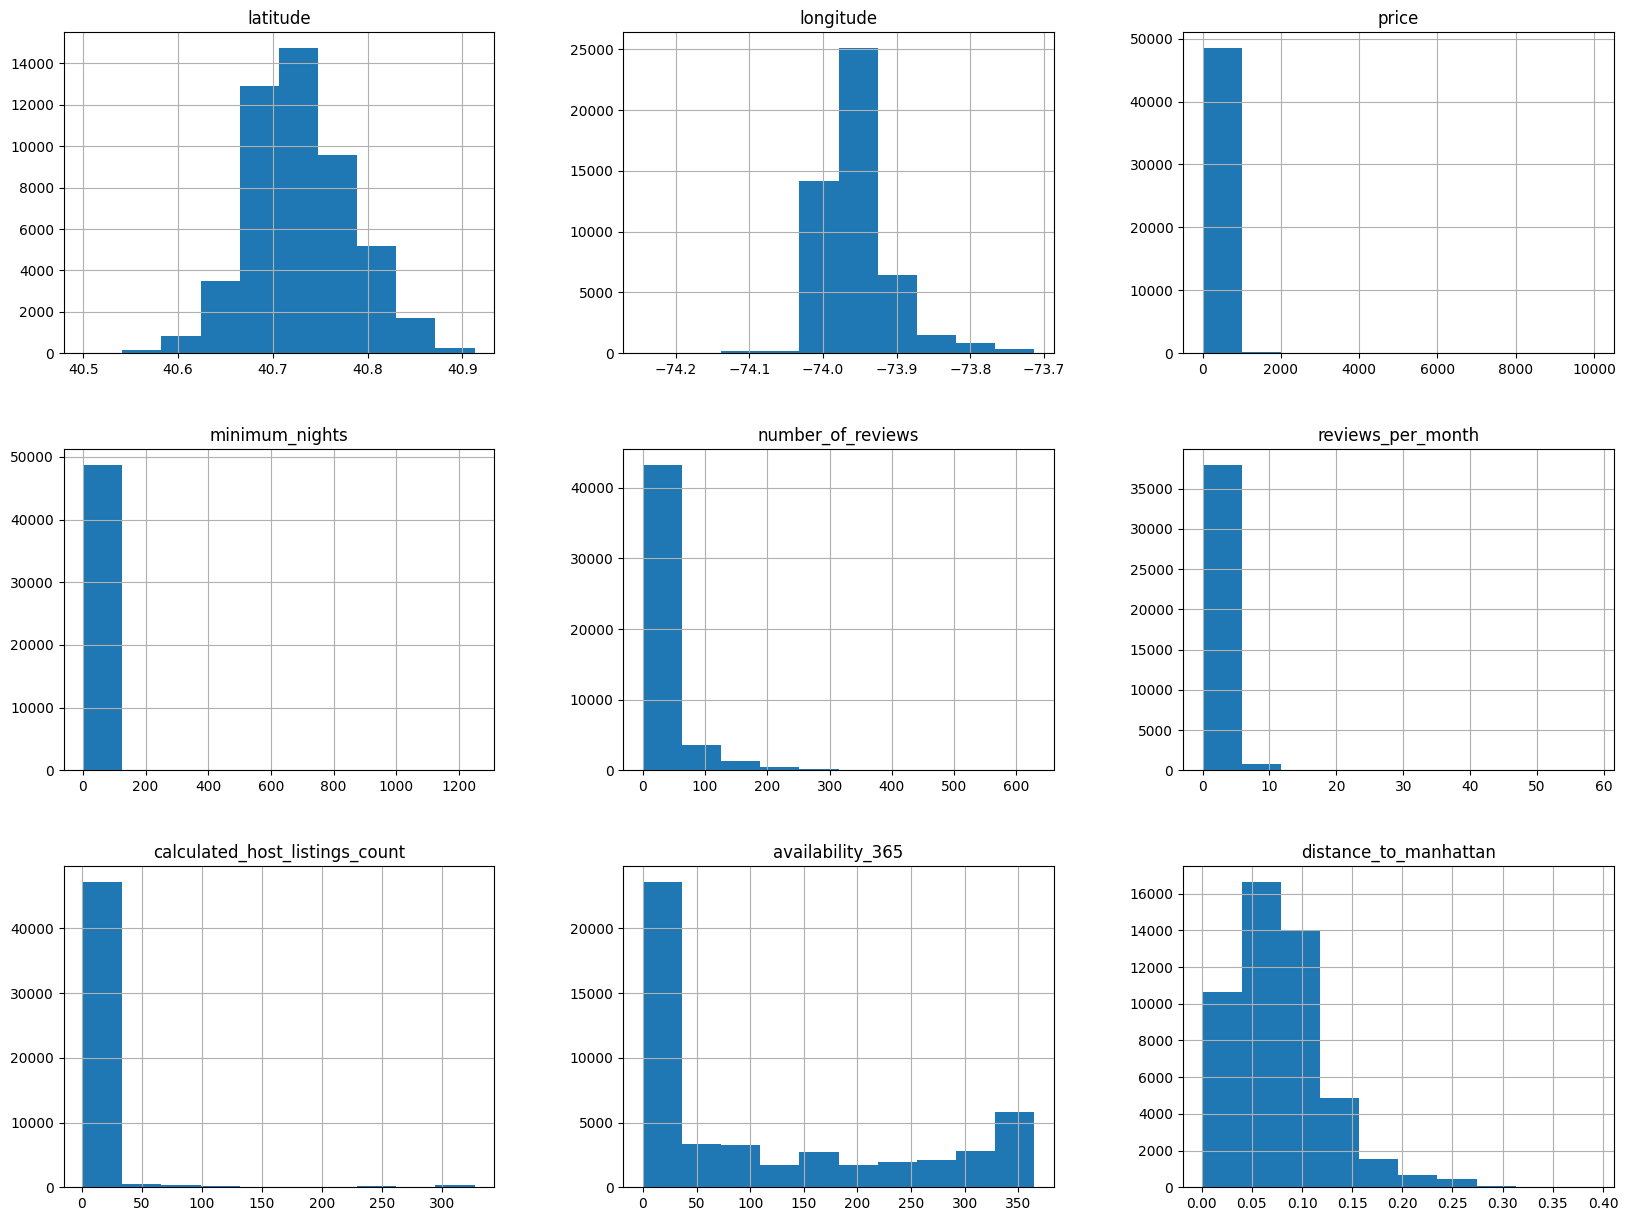

In [211]:
df.hist(figsize=(20, 15))
plt.show()

**Работа с признаками**

In [220]:
#OrdinalEncoder
enc = OrdinalEncoder()
df_enc = encode_func(df, enc)
df_enc.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,distance_to_manhattan
0,1,1,40.64749,-73.97237,1,149,1,9,0.21,6,365,0.135615
1,2,2,40.75362,-73.98377,2,225,1,45,0.38,2,355,0.032048
2,2,3,40.80902,-73.94190,1,150,3,0,NaN,1,365,0.039120
3,1,4,40.68514,-73.95976,2,89,1,270,4.64,1,194,0.098626
4,2,5,40.79851,-73.94399,2,80,10,9,0.10,1,0,0.031271


In [263]:
#CountEncoder
enc = CountEncoder()
df_enc = encode_func(df, enc)
df_enc.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,distance_to_manhattan
0,20104,175,40.64749,-73.97237,22326,149,1,9,0.21,6,365,0.135615
1,21661,1545,40.75362,-73.98377,25409,225,1,45,0.38,2,355,0.032048
2,21661,2658,40.80902,-73.94190,22326,150,3,0,NaN,1,365,0.039120
3,20104,572,40.68514,-73.95976,25409,89,1,270,4.64,1,194,0.098626
4,21661,1117,40.79851,-73.94399,25409,80,10,9,0.10,1,0,0.031271


In [247]:
#FrequencyEncoder
enc = CountEncoder()
df_enc = encode_func(df, enc)
df_enc.head()

df_enc['neighbourhood_group'] = df_enc['neighbourhood_group']/df.shape[0]
df_enc['neighbourhood'] = df_enc['neighbourhood']/df.shape[0]
df_enc['room_type'] = df_enc['room_type']/df.shape[0]

df_enc.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,distance_to_manhattan
0,0.411167,0.003579,40.64749,-73.97237,0.456611,149,1,9,0.21,6,365,0.135615
1,0.443011,0.031598,40.75362,-73.98377,0.519665,225,1,45,0.38,2,355,0.032048
2,0.443011,0.054361,40.80902,-73.94190,0.456611,150,3,0,NaN,1,365,0.039120
3,0.411167,0.011699,40.68514,-73.95976,0.519665,89,1,270,4.64,1,194,0.098626
4,0.443011,0.022845,40.79851,-73.94399,0.519665,80,10,9,0.10,1,0,0.031271


In [258]:
#OneHotEncoder
enc = OneHotEncoder()

data_enc = df.drop(['neighbourhood_group','neighbourhood','room_type'], axis = 1).join(enc.fit_transform(df[['neighbourhood_group','neighbourhood','room_type']], axis = 0))
data_enc.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,distance_to_manhattan,neighbourhood_group_1,...,neighbourhood_215,neighbourhood_216,neighbourhood_217,neighbourhood_218,neighbourhood_219,neighbourhood_220,neighbourhood_221,room_type_1,room_type_2,room_type_3
0,40.64749,-73.97237,149,1,9,0.21,6,365,0.135615,1,...,0,0,0,0,0,0,0,1,0,0
1,40.75362,-73.98377,225,1,45,0.38,2,355,0.032048,0,...,0,0,0,0,0,0,0,0,1,0
2,40.80902,-73.94190,150,3,0,NaN,1,365,0.039120,0,...,0,0,0,0,0,0,0,1,0,0
3,40.68514,-73.95976,89,1,270,4.64,1,194,0.098626,1,...,0,0,0,0,0,0,0,0,1,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0.031271,0,...,0,0,0,0,0,0,0,0,1,0


In [213]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  int64  
 1   neighbourhood                   48895 non-null  int64  
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  int64  
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
 11  distance_to_manhattan           48895 non-null  float64
dtypes: float64(4), int64(8)
memory u

In [253]:
# -999
df_enc['reviews_per_month'] = df_enc['reviews_per_month'].fillna(-999)
df_enc = df_enc.dropna()
df_enc.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,distance_to_manhattan
0,0.411167,0.003579,40.64749,-73.97237,0.456611,149,1,9,0.210000,6,365,0.135615
1,0.443011,0.031598,40.75362,-73.98377,0.519665,225,1,45,0.380000,2,355,0.032048
2,0.443011,0.054361,40.80902,-73.94190,0.456611,150,3,0,1.373221,1,365,0.039120
3,0.411167,0.011699,40.68514,-73.95976,0.519665,89,1,270,4.640000,1,194,0.098626
4,0.443011,0.022845,40.79851,-73.94399,0.519665,80,10,9,0.100000,1,0,0.031271


In [264]:
# mean()
df_enc.loc[:, 'reviews_per_month'] = df_enc.reviews_per_month.fillna(df_enc.reviews_per_month.mean())
df_enc = df_enc.dropna()
df_enc.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,distance_to_manhattan
0,20104,175,40.64749,-73.97237,22326,149,1,9,0.210000,6,365,0.135615
1,21661,1545,40.75362,-73.98377,25409,225,1,45,0.380000,2,355,0.032048
2,21661,2658,40.80902,-73.94190,22326,150,3,0,1.373221,1,365,0.039120
3,20104,572,40.68514,-73.95976,25409,89,1,270,4.640000,1,194,0.098626
4,21661,1117,40.79851,-73.94399,25409,80,10,9,0.100000,1,0,0.031271


In [265]:
# Scaler
scaler = StandardScaler()

In [266]:
X_train, X_test, y_train, y_test = train_test_split(df_enc.drop(['price'], axis=1), df_enc['price'], test_size=0.3, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

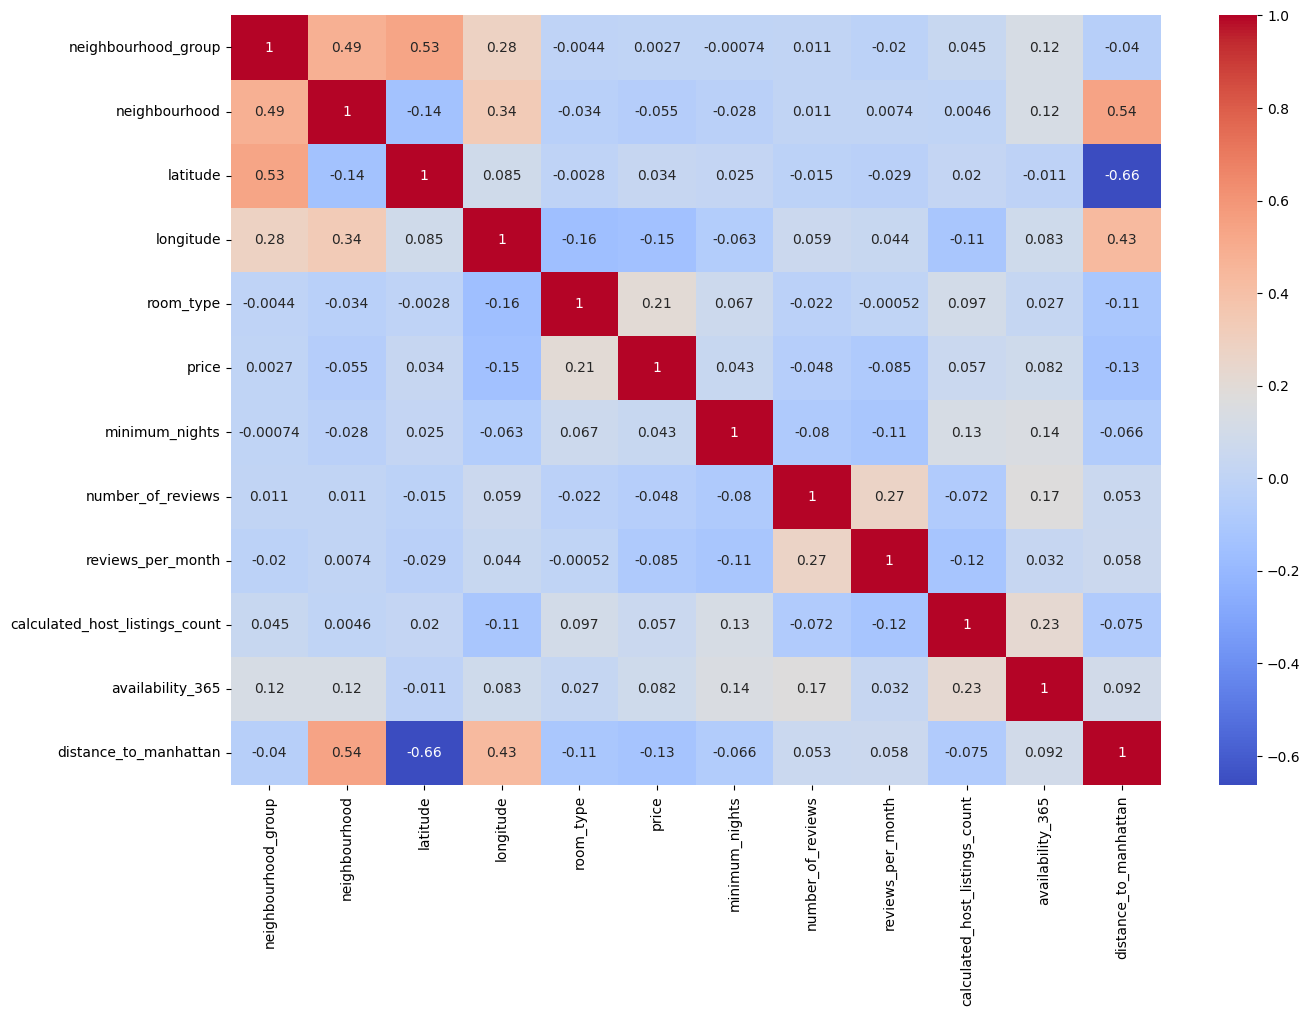

In [217]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_enc.corr(), annot=True, cmap='coolwarm')
plt.show()

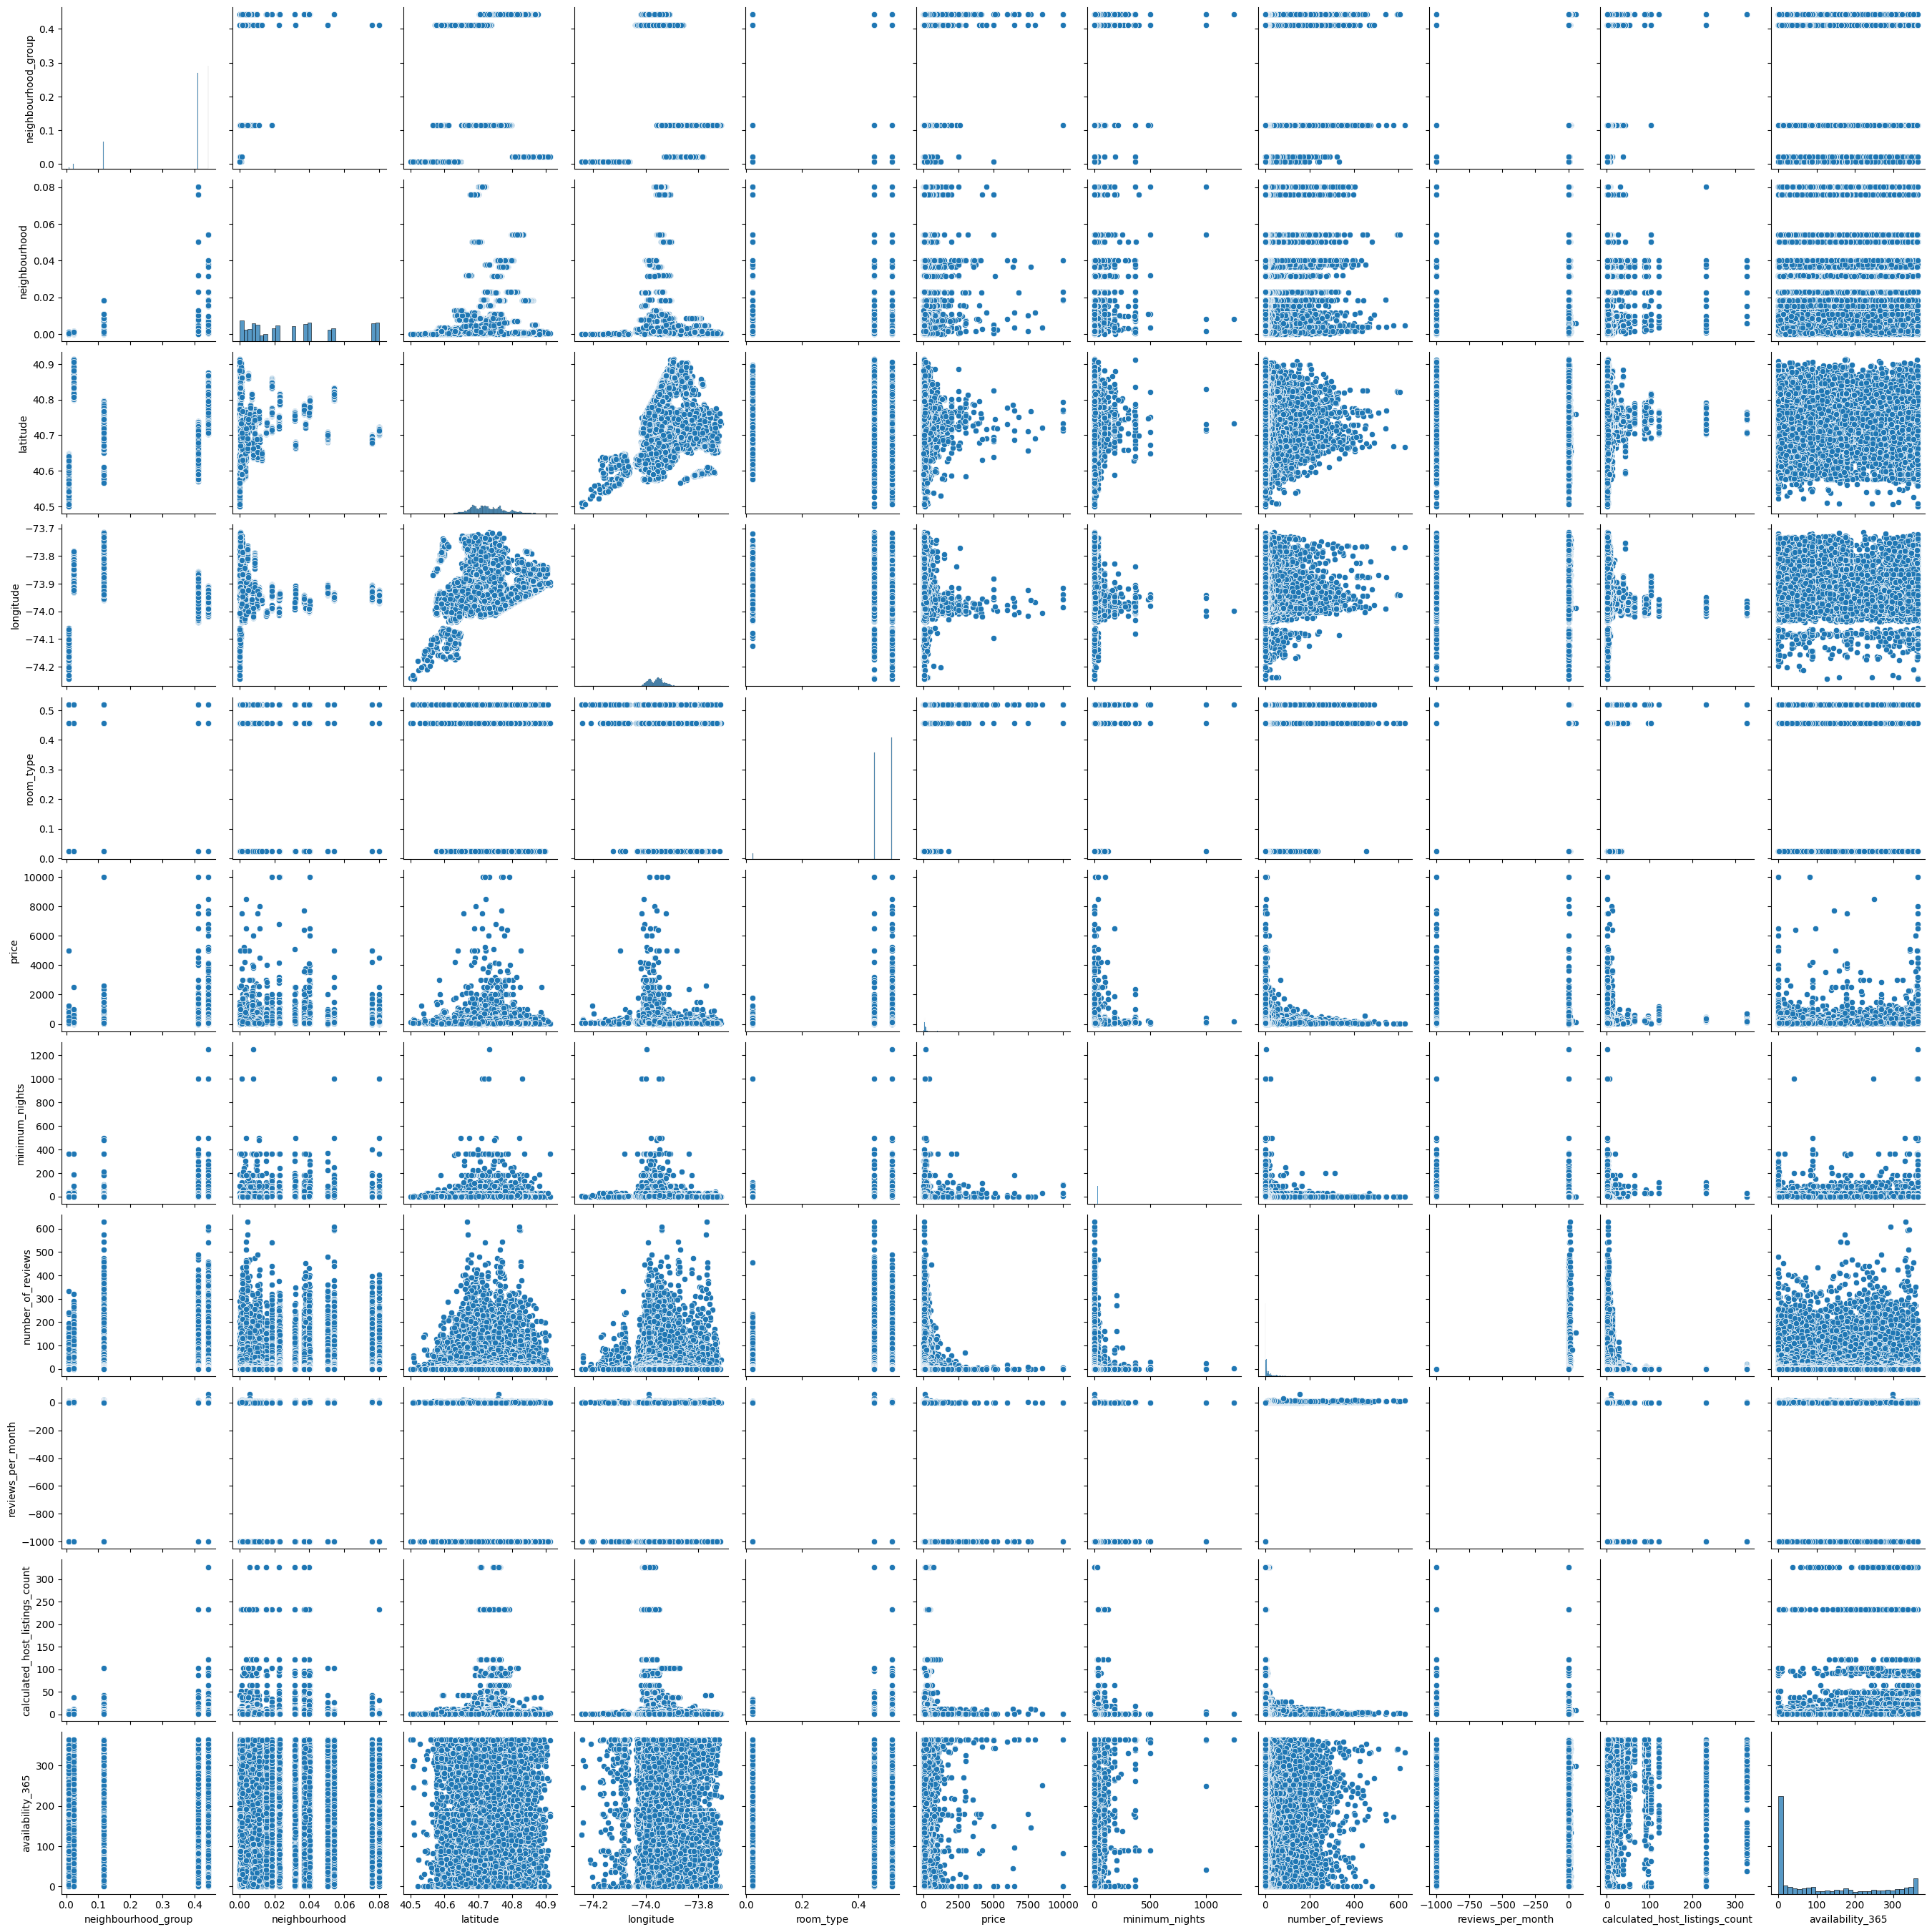

In [51]:
sns.pairplot(df_enc)
plt.show()

In [260]:
#results["<Ordinal/Count/Frequency/OneHot>(with <-999/mean>)"] = evaluate_encoding(df_enc)

#ПОСМОТРЕТЬ ТОЧНОСТЬ
evaluate_encoding(df_enc)

MAE results
ridge 83.5961
lasso 82.982
elastic 83.0194


In [261]:
pd.DataFrame(results, index = ['RidgeCV', 'LassoCV', 'ElasticNetCV']).T

,RidgeCV,LassoCV,ElasticNetCV
Ordinal(with -999),77.157930,76.643383,76.796900
Ordinal(with mean),77.211564,76.576535,76.833422
Count(with -999),83.448250,82.930158,82.963391
Count(with mean),83.596071,82.982013,83.019362
Frequency(with -999),83.448250,82.930158,82.963391
Frequency(with mean),83.596071,82.982013,83.019362
OneHot(with -999),83.596071,82.982013,83.019362
OneHot(with mean),83.596071,82.982013,83.019362


Лучший вариант:

-RidgeCV

-Count(with mean)

In [267]:
model = RidgeCV()
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

0.0830012471703091